In [37]:
import pandas as pd
from label import get_label

In [55]:
df2=pd.read_csv('cleaned_query.csv').drop('Unnamed: 0',axis=1)

In [3]:
import numpy as np

In [203]:
# pip install langdetect

In [61]:
from metrics import MAP, NDCG

In [18]:
from rank_bm25 import BM25Okapi,BM25L, BM25Plus
import numpy as np
import re
import random
from langdetect import detect_langs
from nltk.tokenize import word_tokenize #this package tokenize word by whitespace and punctuation

In [19]:
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet

In [20]:
song_df=pd.read_csv('data/emotionsong.csv').drop('Unnamed: 0',axis=1)

In [21]:
q_df=pd.read_csv('data/query_rating.csv',index_col=[0]).reset_index()

In [23]:
# song_df.head()

In [24]:
# get testing queries and corresponding query_id
queries=q_df[['query_id','query']].drop_duplicates().set_index('query_id')

In [25]:
queries.shape

(20, 1)

In [366]:
queries.index

Int64Index([  25,   32,   66,   91,  488, 2235,  152,  155,  157,  160,  176,
             174,  272, 2544,  412, 3509, 7419, 1303,  659,  189],
           dtype='int64', name='query_id')

### EDA

Text(0.5, 1.0, 'Rating Distribution in Annotation')

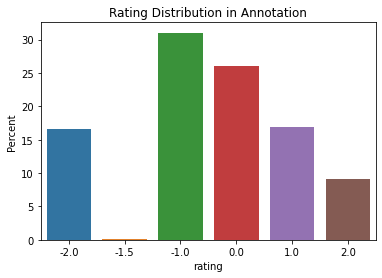

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.barplot(x="rating", y="rating", data=q_df, estimator=lambda x: len(x) / len(q_df) * 100)
ax.set(ylabel="Percent")
plt.title('Rating Distribution in Annotation')

### Baseline

In [27]:
def token(lyrics):
    tokens=word_tokenize(lyrics)
    return tokens

In [28]:
# def get_songs(index,row):
#     corpus_df=song_df.copy()
#     bm25 = BM25Okapi(corpus_df)
#     doc_scores=bm25.get_scores(row['query'].split(" "))
# #     print(len(doc_scores))
# #     print(corpus_df.shape)
#     corpus_df['rank_score']=doc_scores
#     filtered=q_df[q_df['query']==row['query']]
#     song_ids=filtered['song_id'].values
#     val_score=corpus_df[corpus_df['code'].isin(song_ids)]   
#     newdf=val_score.sort_values(by='rank_score',ascending=False)[0:10]
#     origin=[filtered[filtered['song_id']==i]['rating'].values[0] for i in newdf['code']]
#     relevance=np.array([i for i in origin])
#     return relevance

In [102]:
def get_songs(index,row,corpus):
    rating=[]
    corpus_df=song_df.copy()
    bm25 = BM25Okapi(corpus)
    doc_scores=bm25.get_scores(row['query'].split(" "))
    print(len(doc_scores))
    print(corpus_df.shape)
    corpus_df['rank_score']=doc_scores
    filtered=q_df[q_df['query']==row['query']]
    song_ids=filtered['song_id'].values
    val_score=corpus_df.sort_values(by='rank_score',ascending=False)[0:10]
    for index,row in val_score.iterrows():
        if row['code'] in song_ids:
            rating.append(filtered[filtered['song_id']==row['code']]['rating'].values[0])
        else:
            rating.append(-2)        
    relevance=rating
    return relevance

In [93]:
queries

,query
query_id,
25,You had no right to tell me you ever had feelings for me.
32,"Oh, it's so romantic to send people off on their honeymoon."
66,This witness won't return my calls so we're gonna see if we can surprise him coming home.
91,"Okay, okay, come on, you can do it. You can do it!"
488,Fine! You go learn from your qualified instructor! But don't come crying to me when everyone's sick and tired of hearing you play
2235,"Oh anyway, I just wanted to say how wonderful I think you are."
152,"I mean, well, 'cause when I was growing up, you know my dad left, and my mother died, and my stepfather went to jail, so I barely had enough pieces of parents to make one whole one."
155,"It's just, it's just the luckiest baby in the whole world."
157,"Okay, it's a typical New York City apartment. Two girls are just hanging out."


In [96]:
song_df['tokens']=song_df['lyrics'].map(token)
corpus=song_df['tokens'].values

In [111]:
precision_list=[]
ndcg_10list=[]
for index,row in queries.iterrows():
    relevance=get_songs(index,row,corpus)
    print(relevance)
    precision=MAP(relevance)
    precision_list.append(precision)
    ndcg_10=NDCG(relevance)
    ndcg_10list.append(ndcg_10)

2937
(2937, 11)
[-2, -2, -2, -2, -2, -2, -2, -2, -2, -2]
2937
(2937, 11)
[-2, -2, -2, -2, -2, -2, -2, -2, -2, -2]
2937
(2937, 11)
[-2, -2, -2, -2, -2, -2, -2, -2, -2, -2]
2937
(2937, 11)
[-2, -2, 0.0, -2, 1.0, -2, -2, -2, 0.0, 1.0]
2937
(2937, 11)
[-2, -2, -2, -2, -2, -2, -2, -2, -2, -2]
2937
(2937, 11)
[-2, -2, -2, -2, -2, -2, -2, -2, -2, -2]
2937
(2937, 11)
[-2, -2, -2, -2, -2, -2, -2, -2, -2, -2]
2937
(2937, 11)
[-2, -2, -2, -2, -2, -2, -2, -2, -2, -2]
2937
(2937, 11)
[-2, -2, -2, -2, -2, -2, -2, -2, -2, -2]
2937
(2937, 11)
[-2, -2, -2, -2, -2, -2, -2, -2, -2, -2]
2937
(2937, 11)
[-2.0, -2, -2, -2, -2, -2, -2, -2, -2, -2]
2937
(2937, 11)
[-2, -2, -2, -2, -2, -2, -2, -2, -2, -2]
2937
(2937, 11)
[-2, -2, -2, -2, -2, -2, -2, -2, -2, -2]
2937
(2937, 11)
[-2, -2, -2, -2, -2, -2, -2, -2, -2, -2]
2937
(2937, 11)
[-2, -2, -2, -2, -2, -2, -2, -2, -2, -2]
2937
(2937, 11)
[-2, -2, -2, 0.0, -2, -2, -2, -2, -2, -2]
2937
(2937, 11)
[-2, -2, -2, -2, -2, -2, -2, -2, -2, -2]
2937
(2937, 11)
[-2, -2,

In [104]:
baseline['ndcg']=ndcg_10list
baseline['map']=precision_list

In [112]:
baseline['id']=queries.index

In [46]:
baseline=baseline.set_index('id')

In [47]:
plot_df=baseline.merge(query, how='left',left_index=True, right_index=True)

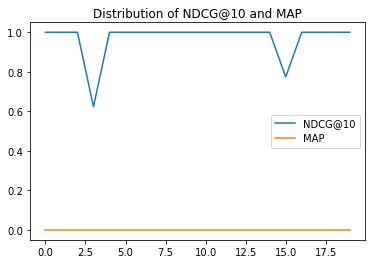

In [125]:
import matplotlib.pyplot as plt
# plt.plot(ndcg_10list,'g*', precision_list, 'ro')
# plt.title('Distribution of NDCG and MAP')
# plt.show()
x_list=range(20)
plt.plot(x_list, ndcg_10list, label='NDCG@10')
plt.plot(x_list, precision_list, label='MAP')
plt.legend()
plt.title('Distribution of NDCG@10 and MAP')
plt.show()

In [108]:
base_precision=sum(precision_list)/len(precision_list)
base_ndcg=sum(ndcg_10list)/len(ndcg_10list)

In [109]:
print(base_precision,base_ndcg)

0.0 0.9698173253027391


### Data Preprocessing

In [67]:
#fliter out no lyrics songs
song_df=song_df[song_df['lyrics']!='no lyrics']

In [192]:
# this code is to check some examples of lyrics
# print(song_df['lyrics'].iloc[3])  

#### Deal with brackets

In [68]:
text_in_round_brackets = sum(list(song_df['lyrics'].map(lambda s: re.findall(r'\((.*?)\)',s))), [])
print('Number of round brackets: {}'.format(len(text_in_round_brackets)))

Number of round brackets: 49758


In [ ]:
random.seed(0)
random.choices(text_in_round_brackets, k=20)

In [185]:
text_in_square_brackets = sum(list(song_df['lyrics'].map(lambda s: re.findall(r'\[(.*?)\]',s))), [])
print('Number of square brackets: {}'.format(len(text_in_square_brackets)))

Number of square brackets: 0


In [193]:
text_in_curly_brackets = sum(list(song_df['lyrics'].map(lambda s: re.findall(r'\{(.*?)\}',s))), [])
print('Number of curly brackets: {}'.format(len(text_in_curly_brackets)))

Number of curly brackets: 195


In [ ]:
random.seed(0)
random.choices(text_in_curly_brackets, k=20)

It seems contents inside the curly bracket and round bracket are a part of the lyrics, so I will just remove the brackets and keep the contents inside

In [196]:
# remove round brackets and curly brackets but not text within
song_df['lyrics'] = song_df['lyrics'].map(lambda s: re.sub(r'\(|\)', '', s))
song_df['lyrics'] = song_df['lyrics'].map(lambda s: re.sub(r'\{|\}', '', s))

#### Remove Line Breaks

In [70]:
song_df['lyrics'] = song_df['lyrics'].map(lambda s: re.sub(r' \n|\n', '', s))

#### Remove non-English Lyrics

In [71]:
def get_eng_prob(text):
    detections = detect_langs(text)
    for detection in detections:
        if detection.lang == 'en':
            return detection.prob
    return 0

song_df['en_prob'] = song_df['lyrics'].map(get_eng_prob)

print('Number of english songs: {}'.format(sum(song_df['en_prob'] >= 0.5)))
print('Number of non-english songs: {}'.format(sum(song_df['en_prob'] < 0.5)))

Number of english songs: 2937
Number of non-english songs: 340


In [72]:
song_df = song_df.loc[song_df['en_prob'] >= 0.5]

In [73]:
def lower_url(file):
    file_lowered=file.lower() 
    file_url=re.sub(r'^https?:\/\/.*[\r\n]*', '', file_lowered, flags=re.MULTILINE) #remove url
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', file_url)
# lower vocab and remove url and emoji

In [74]:
song_df['lyrics'] = song_df['lyrics'].map(lower_url)

In [75]:
song_df['tokens']= song_df['lyrics'].map(token)

In [76]:
def remove_dig(tokens):
    #remove punctuations & numbers
    filtered_words = [re.sub(r'\d+', '', word) for word in tokens]
    return filtered_words
# remove digits 

In [77]:
import re
output = re.sub(r'\d+', '', '123hello 456world')

In [78]:
song_df['tokens']= song_df['tokens'].map(remove_dig)

In [79]:
def remove_stop(tokens):
    f = open("stoplist.txt", "r")
    stoplist=f.read()
    words = [w for w in tokens if not w in stoplist]
    return words
# remove stopwords

In [80]:
song_df['tokens']= song_df['tokens'].map(remove_stop)

In [81]:
wnl = WordNetLemmatizer()
def get_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
def lemma_token(tokens):
    tagged_words=nltk.pos_tag(tokens)
    new_token = []
    for i in tagged_words:
        wordnet_pos = get_pos(i[1]) #or wordnet.NOUN
        new_token.append(wnl.lemmatize(i[0],pos=wordnet_pos))
    return new_token
# lemmetize my bag of word

In [82]:
song_df['tokens']= song_df['tokens'].map(lemma_token)

[Text(0, 0.5, 'Percent')]

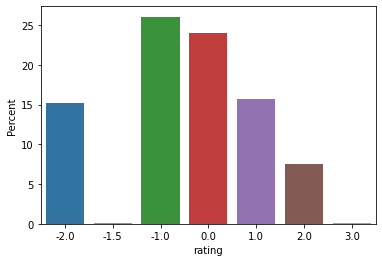

In [10]:
import seaborn as sns
import matplotlib.pyplot as pltq
ax = sns.barplot(x="rating", y="rating", data=q_df, estimator=lambda x: len(x) / len(q_df) * 100)
ax.set(ylabel="Percent")

In [ ]:
# ## get the code for all songs in corpus
# codes=q_df['song_id']
# codes=codes.values.tolist()

# ## using codes to get lyrics for songs to create corpus for ranking search
# corpus=[song_df[song_df['code']==i].lyrics.to_string(index=False) for i in codes]

### Build Models

In [184]:
emotion=[]
for i in labels:
    if i=='0':
        emotion.append('negative')
    elif i=='1':
        emotion.append('positive')
    else:
        emotion.append('neutral')

In [179]:
# queries.sort()
labels=['0','1','2','1','0','1','0','1','2','2','1','0','1','0','1','0','0','0','1','2']

### BM25

In [87]:
def get_ranked_songs(index,row,model):
    song_copy=song_df.copy()
    label=get_label(row['query'])
    #filter out corresponding songs
    if label=='0':
        corpus_df=song_copy[song_copy['final_score']=='negative']
    elif label=='1':
        corpus_df=song_copy[song_copy['final_score']=='positive']
    else:
        corpus_df=song_copy[song_copy['final_score']=='neutral']
    corpus=corpus_df['tokens'].values
    bm25 = model(corpus)
    doc_scores=bm25.get_scores(remove_stop(row['query'].split(" ")))
    corpus_df['rank_score']=doc_scores
    filtered=q_df[q_df['query']==row['query']]
    song_ids=filtered['song_id'].values
    val_score=corpus_df[corpus_df['code'].isin(song_ids)]
    if len(val_score['code'])<10:
        corpus=song_copy['tokens'].values
        bm25=model(corpus)
        doc_scores=bm25.get_scores(remove_stop(row['query'].split(" ")))
        song_copy['rank_score']=doc_scores
        val_score=song_copy[song_copy['code'].isin(song_ids)]
    newdf=val_score.sort_values(by='rank_score',ascending=False)[0:10]
    origin=[filtered[filtered['song_id']==i]['rating'].values[0] for i in newdf['code']]
    relevance=np.array([i for i in origin])
    return relevance
        
# for index, row in queries[1:11].iterrows():

In [86]:
queries

,query
query_id,
25,You had no right to tell me you ever had feelings for me.
32,"Oh, it's so romantic to send people off on their honeymoon."
66,This witness won't return my calls so we're gonna see if we can surprise him coming home.
91,"Okay, okay, come on, you can do it. You can do it!"
488,Fine! You go learn from your qualified instructor! But don't come crying to me when everyone's sick and tired of hearing you play
2235,"Oh anyway, I just wanted to say how wonderful I think you are."
152,"I mean, well, 'cause when I was growing up, you know my dad left, and my mother died, and my stepfather went to jail, so I barely had enough pieces of parents to make one whole one."
155,"It's just, it's just the luckiest baby in the whole world."
157,"Okay, it's a typical New York City apartment. Two girls are just hanging out."


In [88]:
def get_result(model):
    precision_list=[]
    ndcg_10list=[]
    for index,row in queries.iterrows():
        relevance=get_ranked_songs(index,row,model)
        precision=MAP(relevance)
        precision_list.append(precision)
        ndcg_10=NDCG(relevance)
        ndcg_10list.append(ndcg_10)
    base_precision=sum(precision_list)/len(precision_list)
    base_ndcg=sum(ndcg_10list)/len(ndcg_10list)
    return base_precision,base_ndcg,precision_list,ndcg_10list

In [89]:
# BM25Okapi,BM25L, BM25Plus
result_bm25=get_result(BM25Okapi)

In [ ]:
result_bm25=get_result(BM25Plus)

In [126]:
result_bm25plus=get_result(BM25Plus)

In [127]:
result_bm25L=get_result(BM25L)

In [129]:
result_bm25L

(0.08700892857142857,
 0.7538818543210994,
 [0.0,
  0.1,
  0.0,
  0.25,
  0.16666666666666666,
  0.05555555555555555,
  0.1,
  0.0,
  0.0,
  0.0,
  0.0,
  0.21666666666666667,
  0.0,
  0.0,
  0.0,
  0.4151785714285714,
  0.05,
  0.27777777777777773,
  0.0,
  0.10833333333333334],
 [0.7048679318447116,
  0.8060795769816803,
  0.9391106843560418,
  0.799530078714085,
  0.7011675403171992,
  0.6162178492464959,
  0.690936484482725,
  0.9351819179193998,
  0.7347294715455495,
  0.6956002573582063,
  0.7045290171522969,
  0.6647376214174371,
  0.7135051903624836,
  0.7021184670174953,
  0.7870920821159295,
  0.8262090066284349,
  0.4557734556680115,
  0.8628023591355936,
  0.9436960245689799,
  0.7937520695892323])

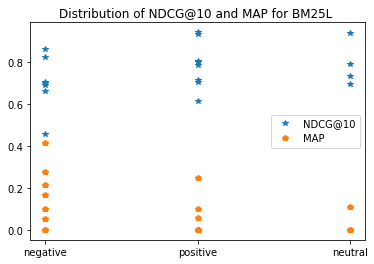

In [194]:
import matplotlib.pyplot as plt
# plt.plot(ndcg_10list,'g*', precision_list, 'ro')
# plt.title('Distribution of NDCG and MAP')
# plt.show()
x_list=range(20)
plt.plot(emotion, result_bm25L[3], '*', label='NDCG@10')
plt.plot(emotion, result_bm25L[2], 'p',label='MAP')
plt.legend()
plt.title('Distribution of NDCG@10 and MAP for BM25L ')
plt.show()

In [90]:
result_bm25

(0.12569444444444441,
 0.772629711989685,
 [0.05555555555555555,
  0.27777777777777773,
  0.0,
  0.25,
  0.25,
  0.1,
  0.16666666666666666,
  0.0,
  0.0,
  0.0,
  0.0,
  0.4666666666666666,
  0.0,
  0.0,
  0.0,
  0.3972222222222222,
  0.08333333333333333,
  0.4166666666666667,
  0.0,
  0.05],
 [0.5759259773759726,
  0.8018606969133065,
  0.9398250220951573,
  0.799530078714085,
  0.7606292140842655,
  0.6439843031922822,
  0.7706066822786808,
  0.9351819179193998,
  0.7084003640058083,
  0.6956002573582063,
  0.7469009578248269,
  0.8841596693919536,
  0.7135051903624836,
  0.7272083696801035,
  0.7870920821159295,
  0.7662966573853661,
  0.5452865075389465,
  0.8931149306780273,
  0.9436960245689799,
  0.8137893363099161])

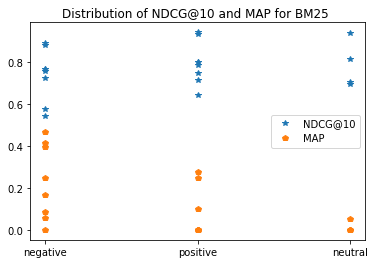

In [190]:
import matplotlib.pyplot as plt
# plt.plot(ndcg_10list,'g*', precision_list, 'ro')
# plt.title('Distribution of NDCG and MAP')
# plt.show()
x_list=range(20)
plt.plot(emotion, result_bm25[3],"*", label='NDCG@10')
plt.plot(emotion, result_bm25[2], "p",label='MAP')
plt.legend()
plt.title('Distribution of NDCG@10 and MAP for BM25 ')
plt.show()

In [128]:
result_bm25plus

(0.09605489417989417,
 0.7471929562871317,
 [0.05,
  0.1,
  0.0,
  0.25,
  0.16666666666666666,
  0.07142857142857142,
  0.24074074074074073,
  0.0,
  0.0,
  0.0,
  0.0,
  0.21666666666666667,
  0.0,
  0.08333333333333333,
  0.0,
  0.2625,
  0.07142857142857142,
  0.3,
  0.0,
  0.10833333333333334],
 [0.7091152986764625,
  0.7647015291252911,
  0.9391106843560418,
  0.799530078714085,
  0.7011675403171992,
  0.6002788988430229,
  0.7752320967541989,
  0.9351819179193998,
  0.7347294715455495,
  0.6956002573582063,
  0.7045290171522969,
  0.6647376214174371,
  0.7135051903624836,
  0.6247570989525042,
  0.7870920821159295,
  0.6915758682492954,
  0.49409837199328777,
  0.8714680077317326,
  0.9436960245689799,
  0.7937520695892323])

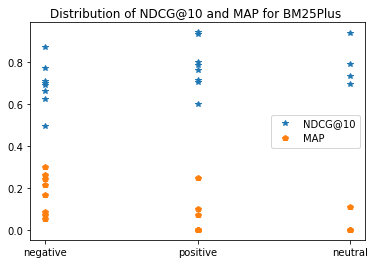

In [193]:
import matplotlib.pyplot as plt
# plt.plot(ndcg_10list,'g*', precision_list, 'ro')
# plt.title('Distribution of NDCG and MAP')
# plt.show()
x_list=range(20)
plt.plot(emotion, result_bm25plus[3],"*", label='NDCG@10')
plt.plot(emotion, result_bm25plus[2], "p",label='MAP')
plt.legend()
plt.title('Distribution of NDCG@10 and MAP for BM25Plus ')
plt.show()

### USE LSI MODEL

In [130]:
import gensim
from collections import defaultdict
from gensim import corpora
from gensim import models
from gensim import similarities

In [ ]:
song_df.head()

#### Get Corpus for All Documents

In [158]:
def get_ranked_songl_isi(index,row):
    song_copy=song_df.copy()
    label=get_label(row['query'])
    #filter out corresponding songs
    if label=='0':
        corpus_df=song_copy[song_copy['final_score']=='negative'].reset_index(drop=True)
    elif label=='1':
        corpus_df=song_copy[song_copy['final_score']=='positive'].reset_index(drop=True)
    else:
        corpus_df=song_copy[song_copy['final_score']=='neutral'].reset_index(drop=True)
    corpus=corpus_df['tokens'].values
    doc_scores = get_corpus(corpus,row['query'])
    corpus_df['rank_score']=doc_scores
    filtered=q_df[q_df['query']==row['query']]
    song_ids=filtered['song_id'].values
    val_score=corpus_df[corpus_df['code'].isin(song_ids)]
    if len(val_score['code'])<10:
        corpus=song_copy['tokens'].values
        doc_scores=get_corpus(corpus,row['query'])
        song_copy['rank_score']=doc_scores
        val_score=song_copy[song_copy['code'].isin(song_ids)]
    newdf=val_score.sort_values(by='rank_score',ascending=False)[0:10]
    origin=[filtered[filtered['song_id']==i]['rating'].values[0] for i in newdf['code']]
    relevance=np.array([i for i in origin])
    return relevance

In [155]:
def get_corpus(test_response,query):
#     texts_doc = [
#       [word for word in document.lower().split() if word not in stoplist]
#       for document in test_response]

# remove words that appear only once
    frequency_test = defaultdict(int)
    for text in test_response:
        for token in text:
            frequency_test[token] += 1

    texts_doc = [
        [token for token in text if frequency_test[token] > 1]
        for text in test_response
        ]
    dictionary = corpora.Dictionary(texts_doc)
    corpus = [dictionary.doc2bow(text) for text in texts_doc]
    lsi_new = models.LsiModel(corpus, id2word=dictionary, num_topics=3)
    index = similarities.MatrixSimilarity(lsi_new[corpus])  
    vec_bow = dictionary.doc2bow(query.lower().split())
    vec_lsi = lsi_new[vec_bow]  # convert the query to LSI space
    sims_1 = index[vec_lsi] 
#     newsim = sorted(enumerate(sims_1), key=lambda item: -item[1])
   
    return sims_1 # get  

In [156]:
def get_result():
    precision_list=[]
    ndcg_10list=[]
    for index,row in queries.iterrows():
        relevance=get_ranked_songl_isi(index,row)
        precision=MAP(relevance)
        precision_list.append(precision)
        ndcg_10=NDCG(relevance)
        ndcg_10list.append(ndcg_10)
    base_precision=sum(precision_list)/len(precision_list)
    base_ndcg=sum(ndcg_10list)/len(ndcg_10list)
    return base_precision,base_ndcg,precision_list,ndcg_10list

In [159]:
lsi_result=get_result()

In [161]:
lsi_result

(0.16092261904761904,
 0.7897458315949801,
 [0.05555555555555555,
  0.1037037037037037,
  0.5,
  0.05,
  0.08333333333333333,
  0.0,
  0.07142857142857142,
  0.0,
  0.0,
  0.0,
  0.16666666666666666,
  0.47916666666666663,
  0.17857142857142858,
  0.40740740740740744,
  0.25,
  0.4333333333333333,
  0.2,
  0.125,
  0.0,
  0.11428571428571428],
 [0.6561755035990593,
  0.6969838825920315,
  0.951303312496272,
  0.7391306734762227,
  0.8135546195337107,
  0.7881352684037626,
  0.7669038376588355,
  0.7798876409084297,
  0.8771594779255228,
  0.8460472675200911,
  0.7489304453584646,
  0.885515206635435,
  0.7511115956707334,
  0.852614893500929,
  0.7835688903117697,
  0.8213308203309805,
  0.6529406977538806,
  0.8287238379123186,
  0.8432490920481652,
  0.7116496682629879])

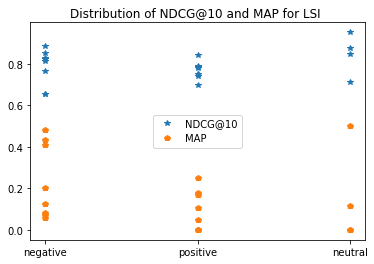

In [185]:
import matplotlib.pyplot as plt
# plt.plot(ndcg_10list,'g*', precision_list, 'ro')
# plt.title('Distribution of NDCG and MAP')
# plt.show()
x_list=range(20)
plt.plot(emotion, lsi_result[3],"*", label='NDCG@10')
plt.plot(emotion, lsi_result[2], "p",label='MAP')
plt.legend()
plt.title('Distribution of NDCG@10 and MAP for LSI ')
plt.show()

In [186]:
df=pd.DataFrame()

In [187]:
df['label']=emotion
df['ndcg']=lsi_result[3]
df['map']=lsi_result[2]

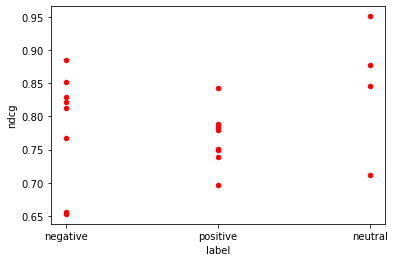

In [188]:
import matplotlib.pyplot as plt
import pandas as pd

# a scatter plot comparing num_children and num_pets
df.plot(kind='scatter',x='label',y='ndcg',color='red')
df.plot(kind='scatter',x='label',y='ndcg',color='red')
plt.show()

In [169]:
len(labels)

22

In [171]:
queries

,query
query_id,
25,You had no right to tell me you ever had feelings for me.
32,"Oh, it's so romantic to send people off on their honeymoon."
66,This witness won't return my calls so we're gonna see if we can surprise him coming home.
91,"Okay, okay, come on, you can do it. You can do it!"
488,Fine! You go learn from your qualified instructor! But don't come crying to me when everyone's sick and tired of hearing you play
2235,"Oh anyway, I just wanted to say how wonderful I think you are."
152,"I mean, well, 'cause when I was growing up, you know my dad left, and my mother died, and my stepfather went to jail, so I barely had enough pieces of parents to make one whole one."
155,"It's just, it's just the luckiest baby in the whole world."
157,"Okay, it's a typical New York City apartment. Two girls are just hanging out."


In [200]:
def get_song_lsi(query):
    song_copy=song_df.copy()
    label=get_label(query)
    #filter out corresponding songs
    if label=='0':
        corpus_df=song_copy[song_copy['final_score']=='negative'].reset_index(drop=True)
    elif label=='1':
        corpus_df=song_copy[song_copy['final_score']=='positive'].reset_index(drop=True)
    else:
        corpus_df=song_copy[song_copy['final_score']=='neutral'].reset_index(drop=True)
    corpus=corpus_df['tokens'].values
    doc_scores = get_corpus(corpus,row['query'])
    corpus_df['rank_score']=doc_scores
    song_info=corpus_df.sort_values(by='rank_score',ascending=False)[0:10]
    return song_info

In [201]:
def print_songs(query):
    query=input('')
    song_info=get_song_lsi(query)
    for index, row in song_info.iterrows():
        print(row['song'],row['singer'])

In [197]:
# song_df.head()

In [203]:
print_songs(query)

I like today's weather
Show You How The Killers
Red Clay Freddie Hubbard
Just One Look Doris Troy
Mr. Brightside (Jacques Lu Cont's Thin White Duke Mix) The Killers
Free VAST
At Night Shakedown
Can I? Yes
Newtown The Slits
All I Wanna Do Iz Listen To Yuz Graham Coxon
Heartbeat Tahiti 80
